## Exploratory Data Analysis

In [998]:
!pip install scikit-learn 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Imran\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [999]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import sklearn
import statsmodels.api as sm

In [1000]:
data = pd.read_csv('ik420.csv')

In [1001]:
# Allocate imported array to column variable names
time = data['X']
wavelength = data['Y']

(a) Construct a histogram and a boxplot of the wavelength, and comment on the plots.

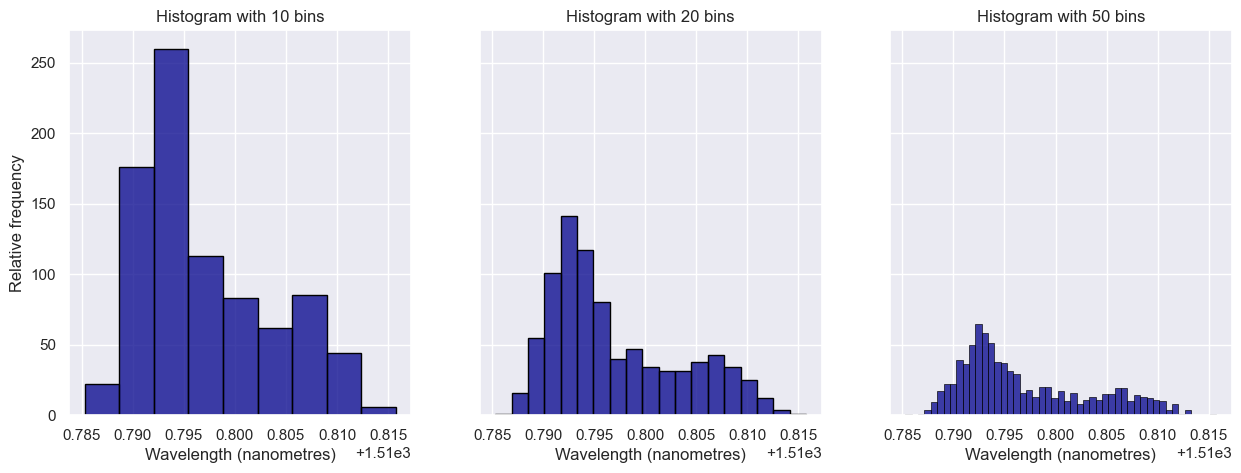

In [1002]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

nbins = [10, 20, 50]

for bi in range(len(nbins)):
    sns.histplot(wavelength, 
                 bins=np.linspace(start=min(wavelength), stop=max(wavelength), num=nbins[bi]),
                 color='darkblue', 
                 edgecolor='black',
                 ax=axes[bi])
    axes[bi].set(xlabel='Wavelength (nanometres)', ylabel='Relative frequency')
    axes[bi].set_title('Histogram with {} bins'.format(nbins[bi]))
    

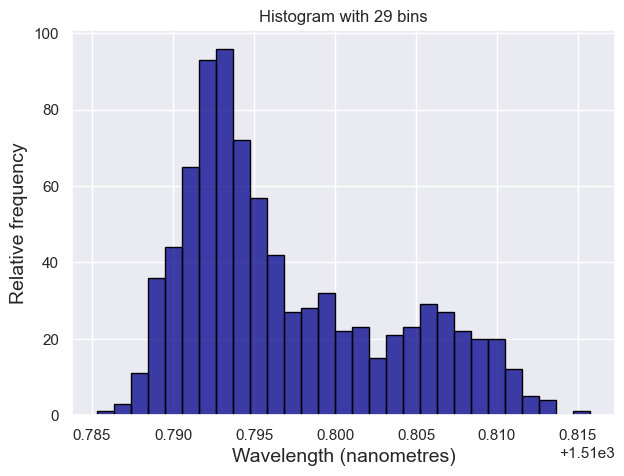

In [1003]:
n = len(wavelength)
nbins = np.sqrt(n).astype(int)

figure = plt.figure(figsize=(7, 5))

sns.histplot(wavelength, 
                bins=nbins,
                color='darkblue', 
                edgecolor='black')

plt.xlabel('Wavelength (nanometres)', fontsize=14)
plt.ylabel('Relative frequency', fontsize=14)

plt.title('Histogram with {} bins'.format(nbins))

plt.show()

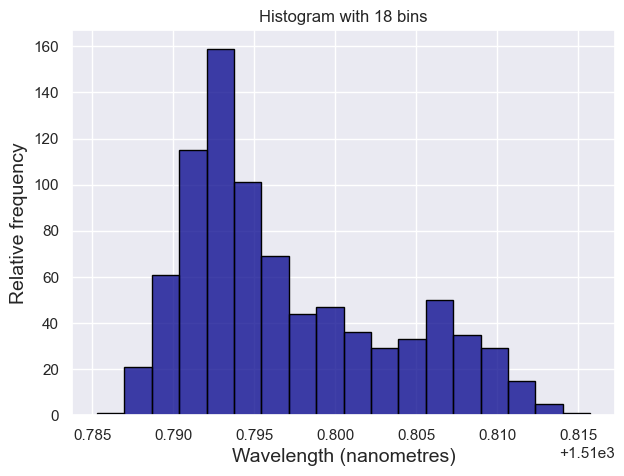

In [1004]:
n = len(wavelength)
# take the cube root of n to get the number of bins
nbins = 2 * (np.cbrt(n).astype(int))

figure = plt.figure(figsize=(7, 5))

sns.histplot(wavelength, 
                bins=nbins,
                color='darkblue', 
                edgecolor='black')

plt.xlabel('Wavelength (nanometres)', fontsize=14)
plt.ylabel('Relative frequency', fontsize=14)

plt.title('Histogram with {} bins'.format(nbins))

plt.show()

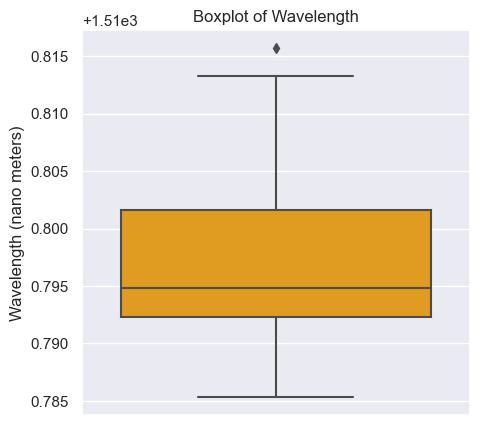

In [1005]:
# boxplot by day 
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( y='Y', data=data, color='orange')
plt.ylabel('Wavelength (nano meters)')
plt.title('Boxplot of Wavelength')
plt.show()

(b) Compute the mean, 10% trimmed mean, median, standard deviation, and interquartile range of the wavelength and present these in a table. Which of these measurements would you use to best describe the data? Justify your answer.

In [1006]:
mean = np.mean(wavelength)
median = np.median(wavelength)
interquarter = np.percentile(wavelength, 75) - np.percentile(wavelength, 25)
ten_percent_trimmed_mean = np.mean(np.sort(wavelength)[int(0.1*len(wavelength)):int(0.9*len(wavelength))])

summary_statistics = pd.DataFrame({'Mean': [mean], 'Median': [median], 'Interquartile range': [interquarter], '10% trimmed mean': [ten_percent_trimmed_mean]}, index = ['Wavelength (nm)'])
summary_statistics

,Mean,Median,Interquartile range,10% trimmed mean
Wavelength (nm),1510.79704,1510.794819,0.009324,1510.796436


(c) Construct a scatterplot of wavelength versus time index.

Text(0.5, 1.0, 'Scatter plot of Wavelength against Time')

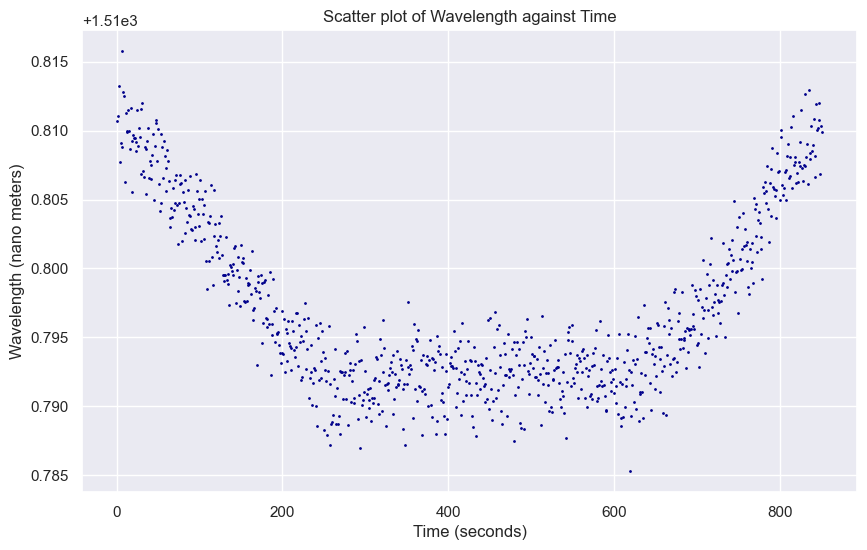

In [1007]:
plt.figure(figsize=(10, 6)) 
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nano meters)');
plt.title('Scatter plot of Wavelength against Time')

## Modelling

(a) Fit a simple linear regression model for wavelength versus time index. Plot the
linear fit on your scatterplot in question 1(c). Comment on the appropriateness of
this model for your data.


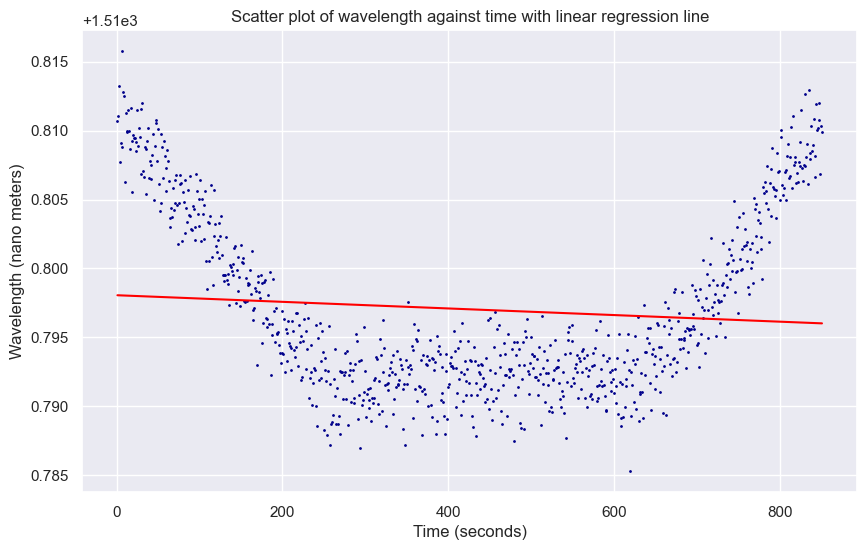

The slope of the line is -0.00000240 nm/s
The intercept of the line is 1510.80 nm


In [1008]:
from sklearn.linear_model import LinearRegression

# Reshape time to be a 2D array
time_2d = time.values.reshape(-1, 1)

model = LinearRegression()
model.fit(time_2d, wavelength)

# Get the slope and intercept of the line best fit
slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.plot(time, model.predict(time_2d), color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nano meters)');
plt.title('Scatter plot of wavelength against time with linear regression line')
plt.show()

print('The slope of the line is {:.8f} nm/s'.format(slope))
print('The intercept of the line is {:.2f} nm'.format(intercept))

The linear model does not fit very well to our data

(b) An assumption of linear regression is that the response is linear in the parameters.
Therefore the response can be modelled as a linear function of polynomials in the
predictor variable. Fit a model for wavelength including both a linear and a quadratic
term in ‘X’, and plot the resulting quadratic fit on your scatterplot (from part 1(c)).

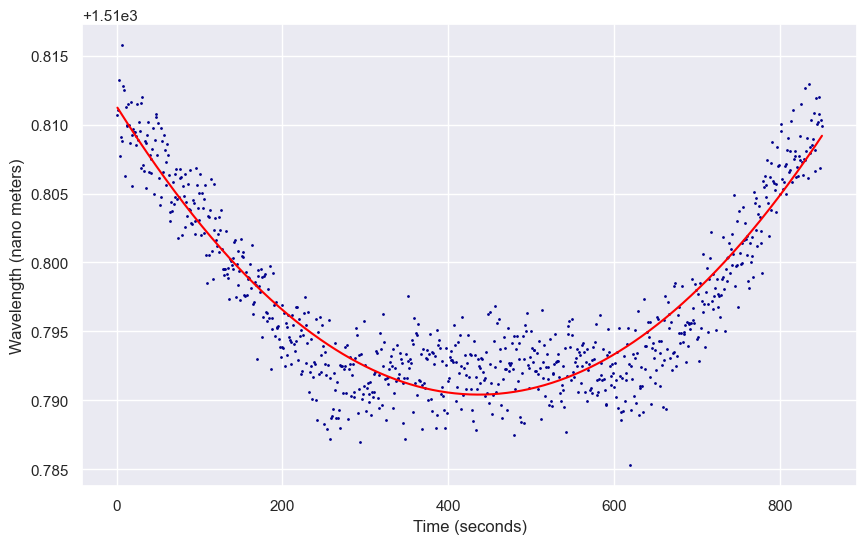

In [1009]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial feature transformer
poly = PolynomialFeatures(degree=2)

# Transform the time data
time_poly = poly.fit_transform(time_2d)

model.fit(time_poly, wavelength)
coefficients = model.coef_
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.plot(time, model.predict(time_poly), color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nano meters)');
plt.show()

In [1010]:
print(f'The equation of the line is: y = {coefficients[0]} + {coefficients[1]}*x + {coefficients[2]}*x^2')

The equation of the line is: y = 0.0 + -9.565010168122807e-05*x + 1.0945176832516401e-07*x^2


c) You can now proceed to fit higher order polynomials, plotting the model fit on the
question 1(c) scatterplot in each case. Note that a polynomial model of order k should
include all lower terms. In polynomial regression you can avoid some numerical
problems if you use the standardised ‘X’ variable. Standardise ’X’ by subtracting
the sample mean of ‘X’ and dividing by the sample standard deviation of ‘X’. Can you
explain why it is better to use the standardised ‘X’ variable in polynomial regression
models? Continue fitting higher order polynomials for as long as you judge to be
reasonable (the next question should help you judge).

The equation of the line is: y = 0.0 + -0.0005889006216352639*x + 0.0066054142184253945*x^2


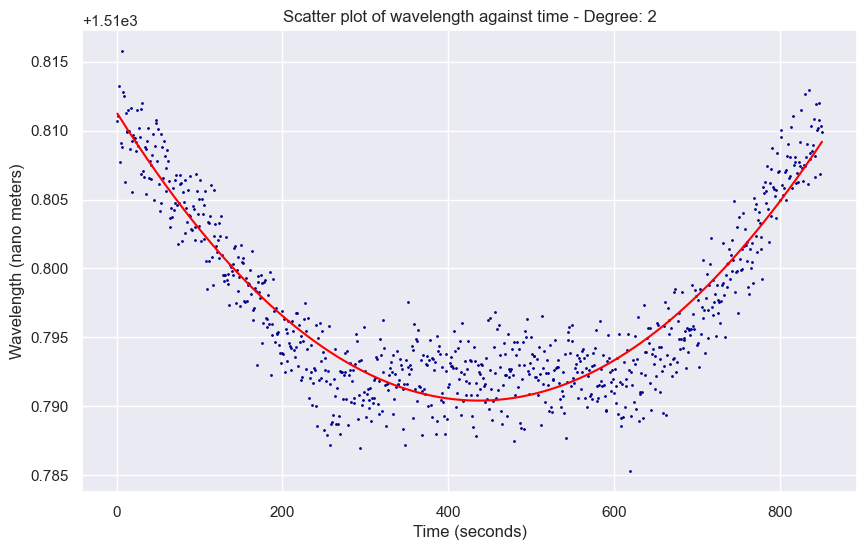

In [1011]:
# Standardise X
time_standardised = (time - np.mean(time)) / np.std(time)

# Transform the time data
time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))

# Fit the model
model.fit(time_standardised_poly, wavelength)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.plot(time, model.predict(time_standardised_poly), color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nano meters)')
plt.title('Scatter plot of wavelength against time - Degree: 2')

print(f'The equation of the line is: y = {coefficients[0]} + {coefficients[1]}*x + {coefficients[2]}*x^2')
plt.show()


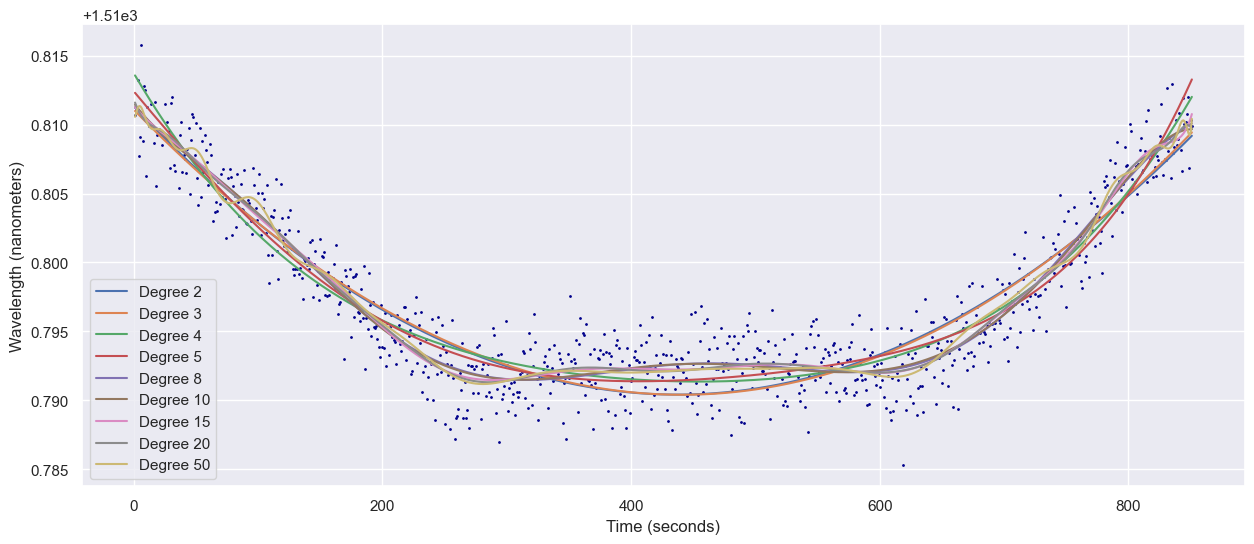

In [1012]:
#make a list of polynomial degrees to try
degrees = [2, 3, 4, 5,8,10,15,20,50]

time_standardised = (time - np.mean(time)) / np.std(time)

# Plot the data points
plt.figure(figsize=(15, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)

#loop through the degrees
for degree in degrees:
    
    # Create a polynomial feature transformer
    poly = PolynomialFeatures(degree=degree)

    # Transform the time data
    time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))

    # Fit the model
    model.fit(time_standardised_poly, wavelength)

    # Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
    time_pred = np.linspace(min(time), max(time), 1000)
    time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)

    # fit the model to the new data using the fitted model from above
    time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    wavelength_pred = model.predict(time_standardised_poly_pred)
    plt.plot(time_pred, wavelength_pred, label=f'Degree {degree}')

plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nanometers)')
plt.legend()
plt.show()

d) Model comparison may be made by Akaike’s Information Criterion (AIC). Briefly explain what the AIC tells you, and how it can be used to select between models. Assuming
the errors are normally distributed in order to calculate the log-likelihood, produce a table of AIC for each model you have fitted. Which model do you select? Justify
your answer.


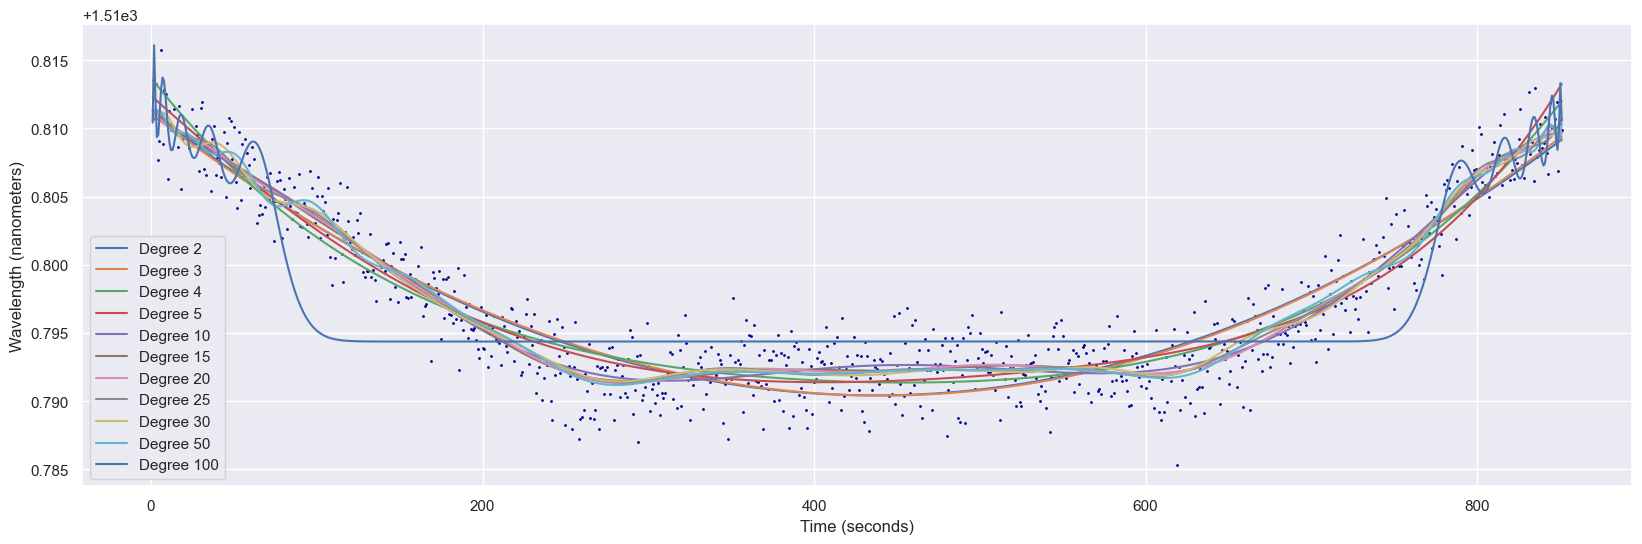

    degree           aic
0        2 -10297.274739
1        3 -10296.586101
2        4 -10420.194036
3        5 -10445.472911
4       10 -10592.159540
5       15 -10596.078108
6       20 -10589.660063
7       25 -10581.015035
8       30 -10567.811609
9       50 -10526.375068
10     100  -9381.654929


,degree,aic
5,15,-10596.078108


In [1013]:
degrees = [2,3,4,5,10,15,20,25,30,50,100]

time_standardised = (time - np.mean(time)) / np.std(time)

# Plot the data points
plt.figure(figsize=(20, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)

aic = []

#loop through the degrees
for degree in degrees:
        
        # Create a polynomial feature transformer
        poly = PolynomialFeatures(degree=degree)
    
        # Transform the time data
        time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))
    
        # Fit the model
        model.fit(time_standardised_poly, wavelength)
    
        # Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
        time_pred = np.linspace(min(time), max(time), 1000)
        time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)
    
        # fit the model to the new data using the fitted model from above
        time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
        wavelength_pred = model.predict(time_standardised_poly_pred)
        plt.plot(time_pred, wavelength_pred, label=f'Degree {degree}')


        # Calculate the AIC
        n = len(time)
        k = degree + 1
        aic.append(n * np.log(np.sum((wavelength - model.predict(time_standardised_poly)) ** 2) / n) + 2 * k)

plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nanometers)')
plt.legend()
plt.show()

# Create a dataframe of the AIC values
aic_df = pd.DataFrame({'degree': degrees, 'aic': aic})
print(aic_df)

# Select the model with the lowest AIC
aic_df[aic_df['aic'] == aic_df['aic'].min()]

    degree           aic
0        0  -8599.512429
1        1  -8604.782087
2        2 -10297.274739
3        3 -10296.586101
4        4 -10420.194036
..     ...           ...
95      95  -9457.151643
96      96  -9432.932164
97      97  -9428.370134
98      98  -9407.239022
99      99  -9301.720816

[100 rows x 2 columns]


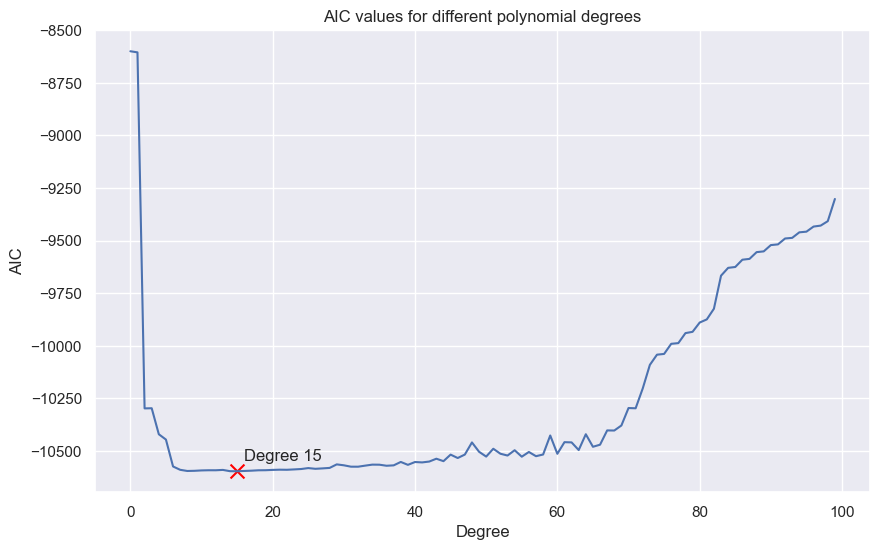

,degree,aic
15,15,-10596.078108


In [1014]:
degrees = [i for i in range(100)]

time_standardised = (time - np.mean(time)) / np.std(time)

aic = []

#loop through the degrees
for degree in degrees:
        
        # Create a polynomial feature transformer
        poly = PolynomialFeatures(degree=degree)
    
        # Transform the time data
        time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))
    
        # Fit the model
        model.fit(time_standardised_poly, wavelength)
    
        # Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
        time_pred = np.linspace(min(time), max(time), 1000)
        time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)
    
        # fit the model to the new data using the fitted model from above
        time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
        wavelength_pred = model.predict(time_standardised_poly_pred)


        # Calculate the AIC
        n = len(time)
        k = degree + 1
        aic.append(n * np.log(np.sum((wavelength - model.predict(time_standardised_poly)) ** 2) / n) + 2 * k)


# Create a dataframe of the AIC values
aic_df = pd.DataFrame({'degree': degrees, 'aic': aic})
print(aic_df)

#plot the AIC values
plt.figure(figsize=(10, 6))
plt.plot(aic_df['degree'], aic_df['aic'])
plt.xlabel('Degree')
plt.ylabel('AIC')
plt.title('AIC values for different polynomial degrees')

#label the minimum AIC value on the plot with a cross and label the degree
plt.scatter(aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'], aic_df[aic_df['aic'] == aic_df['aic'].min()]['aic'], color='red', marker='x', s=100)
plt.text(aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'] + 1, aic_df[aic_df['aic'] == aic_df['aic'].min()]['aic'] + 50, f'Degree {aic_df[aic_df["aic"] == aic_df["aic"].min()]["degree"].values[0]}')
plt.show();

# Select the model with the lowest AIC
aic_df[aic_df['aic'] == aic_df['aic'].min()]

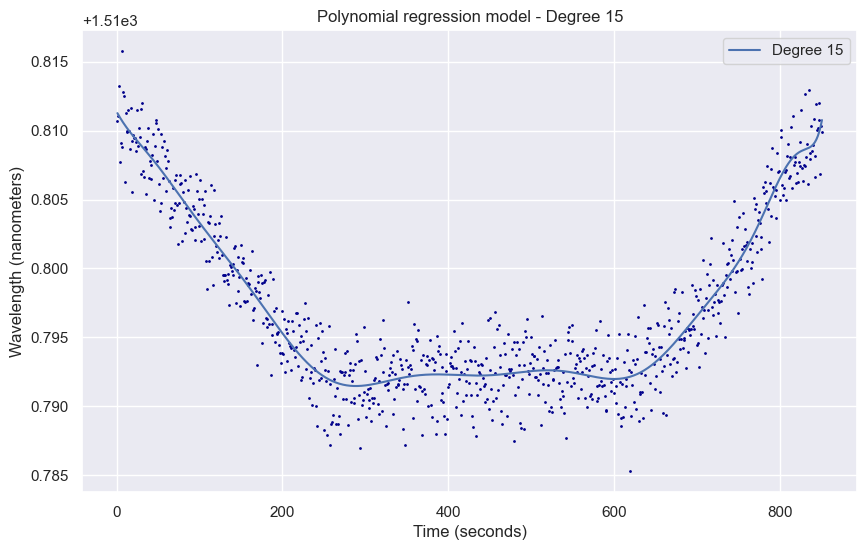

In [1029]:

degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree) 

# Transform the time data
time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))

# Fit the model
model.fit(time_standardised_poly, wavelength)

# Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
time_pred = np.linspace(min(time), max(time), 1000)
time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)

# fit the model to the new data using the fitted model from above
time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
wavelength_pred = model.predict(time_standardised_poly_pred)

plt.figure(figsize=(10, 6))
plt.plot(time_pred, wavelength_pred, label=f'Degree {degree}')

plt.scatter(time, wavelength, color='darkblue', s=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nanometers)')
plt.title('Polynomial regression model - Degree 15')
plt.legend()
plt.show()


For your chosen model from question 2(c), calculate the residuals and construct plots
of the residuals to check your model assumptions. State clearly which assumptions
you are checking with each plot, and your conclusions

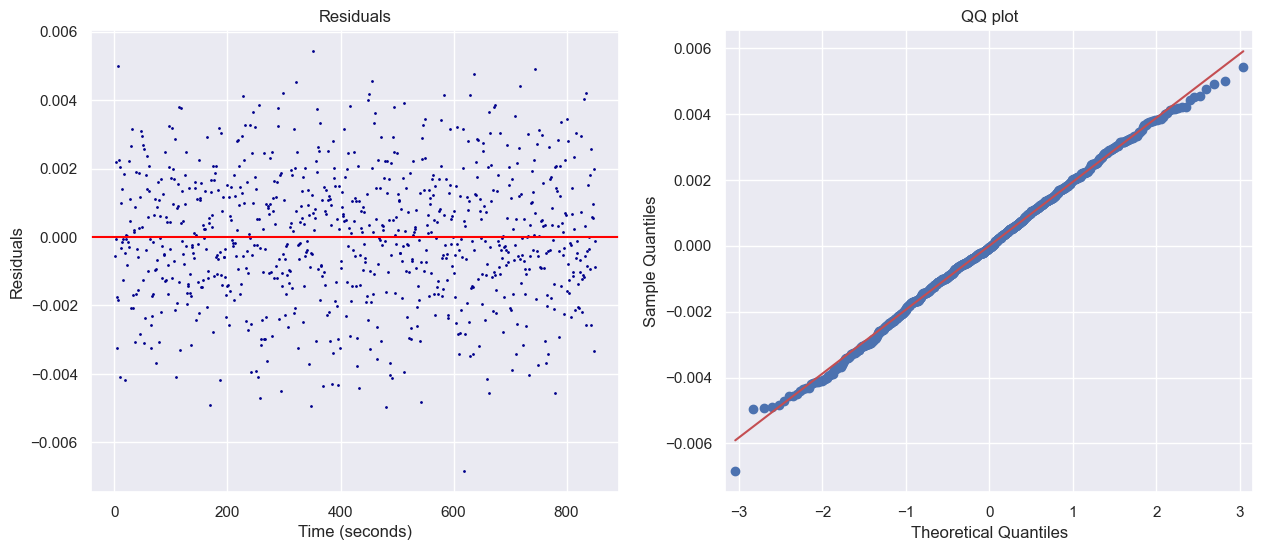

In [1016]:
# Create a polynomial feature transformer
#make degree below select the model with the lowest AIC automatically

degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree) 

# Transform the time data
time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))

# Fit the model
model.fit(time_standardised_poly, wavelength)

# Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
time_pred = np.linspace(min(time), max(time), 1000)
time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)

# fit the model to the new data using the fitted model from above
time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
wavelength_pred = model.predict(time_standardised_poly_pred)

# Calculate the residuals
residuals = wavelength - model.predict(time_standardised_poly)


#plot the residuals and a qq plot in one figure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#plot the residuals
ax[0].scatter(time, residuals, color='darkblue', s=1)
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals')

ax[0].axhline(0, color='red')

#plot the qq plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('QQ plot')
plt.show()


(f) Now suppose you have only been given the responses for time indices equal to
10, 20, 30, . . . , 850. Write code to extract the relevant sample from your data set,
and fit the same model you chose in question 2(c) to the sample (i.e. if you chose a
linear model in question 2(c), fit a linear model in the sample). Make a scatterplot
including the model fit in the sample.

In [1017]:
# Extract the relevant sample
def extract_sample(time, wavelength):
    time_sample = time[9::10]
    wavelength_sample = wavelength[9::10]
    return time_sample, wavelength_sample

def fit_model_predict_plot(time, wavelength, degree, poly):

    time_sample, wavelength_sample = extract_sample(time, wavelength)
    time_standardised_sample = (time_sample - np.mean(time_sample)) / np.std(time_sample)
    time_standardised_poly_sample = poly.fit_transform(time_standardised_sample.values.reshape(-1, 1))
    model.fit(time_standardised_poly_sample, wavelength_sample)

    time_pred = np.linspace(min(time_sample), max(time_sample), 1000)
    time_standardised_pred = (time_pred - np.mean(time_sample)) / np.std(time_sample)
    time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    wavelength_pred = model.predict(time_standardised_poly_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(time_sample, wavelength_sample, color='darkblue', s=1)
    plt.plot(time_pred, wavelength_pred, label=f'Degree {degree}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Wavelength (nanometers)')
    plt.legend()
    plt.title(f'Degree {degree} - Sample size {len(time_sample)}')

    #calculate the residuals
    residuals = wavelength_sample - model.predict(time_standardised_poly_sample)

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(time_sample, residuals, color='darkblue', s=1)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Residuals (nanometers)')
    plt.title(f'Degree {degree} - Sample size {len(time_sample)} - Residuals')

    # Plot a horizontal line at y=0
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()

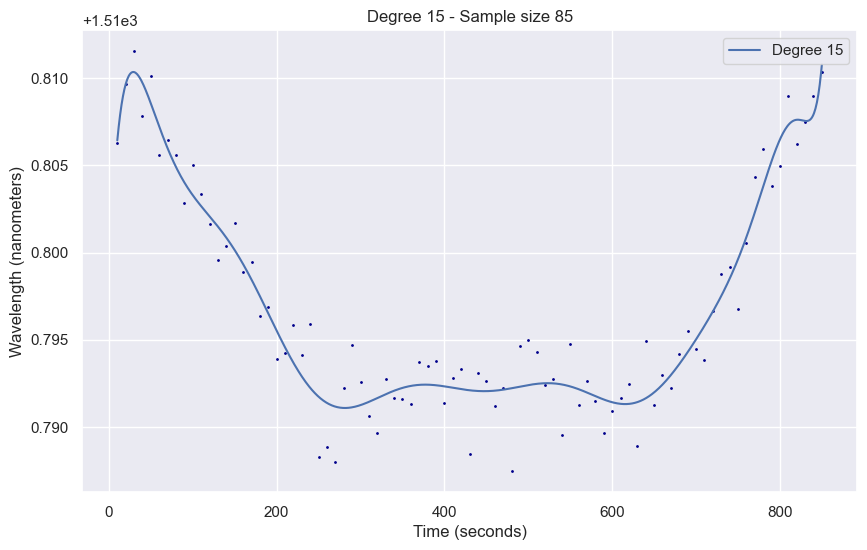

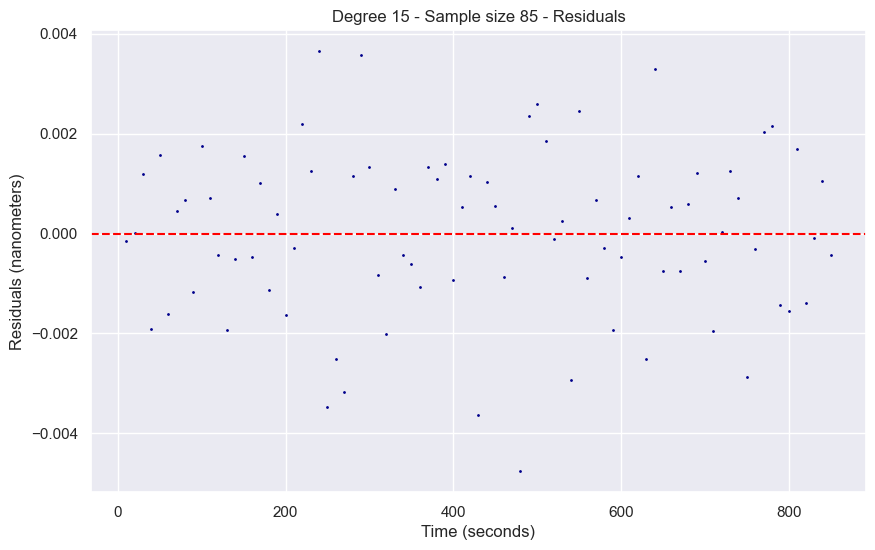

In [1018]:
degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree) 
fit_model_predict_plot(time, wavelength, degree, poly)

## Bootstrapping

Using the sample from question 2(f), you are asked to calculate a 95% pointwise confidence
band for the expected wavelength as a function of time index. It is pointwise as the band
is constructed from a set of confidence intervals, one at each point (value of ‘X’). You
decide to bootstrap.


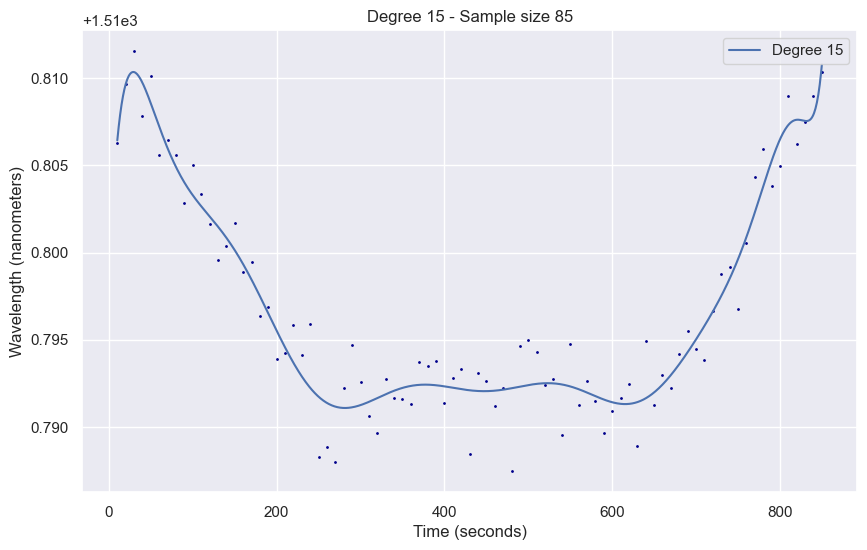

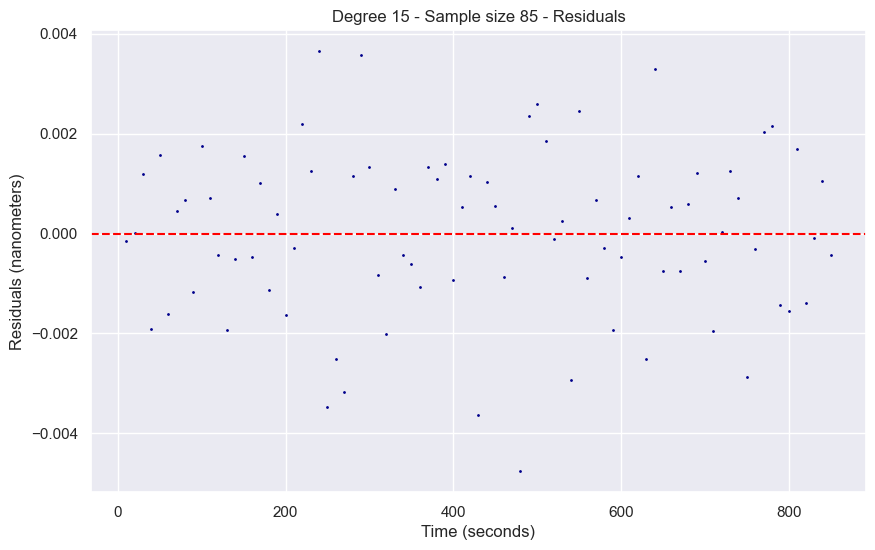

In [1019]:
degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree) 
fit_model_predict_plot(time, wavelength, degree, poly)

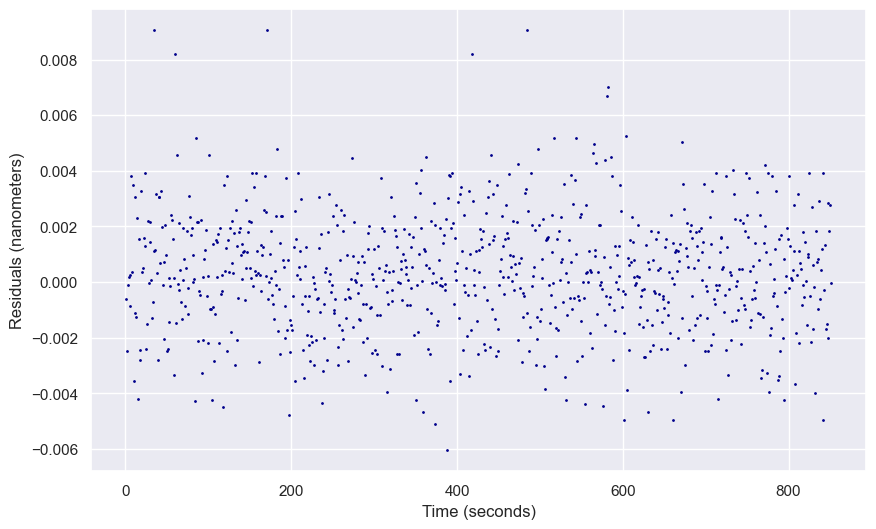

In [1020]:
# Create a vector of residuals
time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))
residuals = wavelength - model.predict(time_standardised_poly)

# Resample from the vector of residuals with replacement, to get a boostrapped sample
residuals_sample = np.random.choice(residuals, size=len(residuals), replace=True)

# Plot the boostrapped residuals
plt.figure(figsize=(10, 6))
plt.scatter(time, residuals_sample, color='darkblue', s=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Residuals (nanometers)')
plt.show()

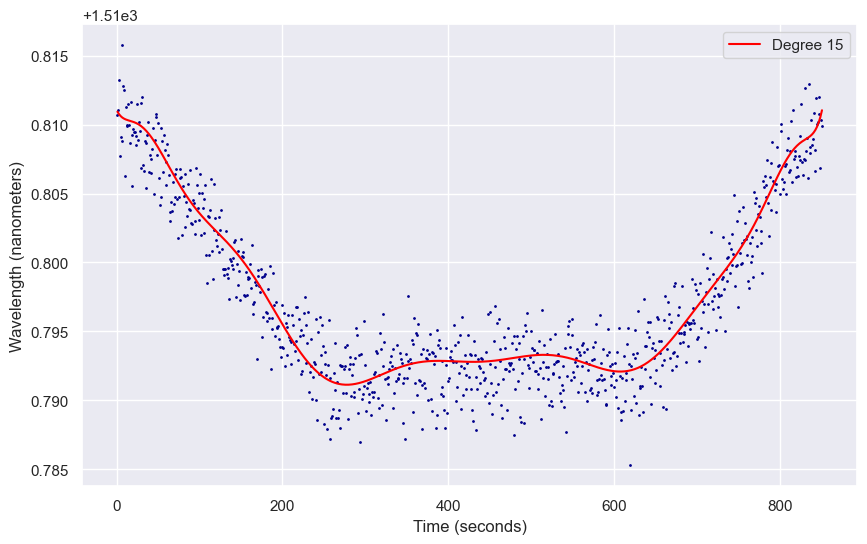

In [1021]:
# Calculate a new response variable
wavelength_boot = wavelength + residuals_sample

# Fit the model to the new response variable
time_standardised_poly = poly.fit_transform(time_standardised.values.reshape(-1, 1))
model.fit(time_standardised_poly, wavelength_boot)

# Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
time_pred = np.linspace(min(time), max(time), len(wavelength_boot))
time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)

# fit the model to the new data using the fitted model from above
time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
wavelength_pred = model.predict(time_standardised_poly_pred)

# Plot the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.plot(time_pred, wavelength_pred, color='red', label=f'Degree {degree}')
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nanometers)')
plt.legend()
plt.show()

In [1022]:
# Extract the relevant sample
def extract_sample(time, wavelength):
    time_sample = time[9:len(time)+1:10]
    wavelength_sample = wavelength[9:len(time)+1:10]
    return time_sample, wavelength_sample

def fit_model_predict_plot_bootsrap(time, wavelength, degree):

    poly = PolynomialFeatures(degree=degree)

    #Extract the sample, standardise the time and fit the model
    time_sample, wavelength_sample = extract_sample(time, wavelength)
    time_standardised_sample = (time_sample - np.mean(time_sample)) / np.std(time_sample)
    time_standardised_poly_sample = poly.fit_transform(time_standardised_sample.values.reshape(-1, 1))
    model.fit(time_standardised_poly_sample, wavelength_sample)

    #Create new time array for prediction
    time_pred = np.linspace(min(time_sample), max(time_sample), time_sample.shape[0])
    time_standardised_pred = (time_pred - np.mean(time_sample)) / np.std(time_sample)
    time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    wavelength_pred = model.predict(time_standardised_poly_pred)

    #calculate the residuals
    residuals = wavelength_sample - model.predict(time_standardised_poly_sample)

    #resample the residuals with replacement
    residuals_sample = np.random.choice(residuals, size=len(residuals), replace=True)

    #calculate the new response variable
    wavelength_boot = wavelength_sample + residuals_sample

    #fit the model to the new response variable
    time_standardised_poly = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    model.fit(time_standardised_poly, wavelength_boot)

    # Plot the fitted model with a new array time_pred to represent the values for which we want to predict the response
    time_pred = np.linspace(min(time), max(time), len(wavelength_boot))
    time_standardised_pred = (time_pred - np.mean(time)) / np.std(time)

    # fit the model to the new data using the fitted model from above
    time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    wavelength_pred = model.predict(time_standardised_poly_pred)

    #save the predicted values in a dataframe
    predicted_values = pd.DataFrame({'time': time_pred, 'wavelength': wavelength_pred})

    return predicted_values


In [1023]:
degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree)

time_sample, wavelength_sample = extract_sample(time, wavelength)

#create an empty dataframe with the same columns as the dataframe returned by the functioN
#set the index to the time column
predicted_values = pd.DataFrame(columns = ['time'])
predicted_values.set_index('time', inplace = True)

#run the fit_model_predict_plot_bootsrap function 100 times and concatenate the results to the dataframe such that a new wavelength column is added for every iteration and ignore the time column in the iteration, merging on the index
for i in range(1000):
    predicted_values = pd.concat([predicted_values, fit_model_predict_plot_bootsrap(time, wavelength, degree)['wavelength']], axis = 1)

In [1024]:
predicted_values

,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,...,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength,wavelength
0,1510.807007,1510.807128,1510.807414,1510.805837,1510.804737,1510.812699,1510.804151,1510.806322,1510.802851,1510.804049,...,1510.800680,1510.803192,1510.804847,1510.800944,1510.805747,1510.797747,1510.804869,1510.802587,1510.806949,1510.804369
1,1510.809391,1510.809009,1510.808297,1510.808538,1510.807885,1510.807478,1510.809935,1510.809930,1510.809837,1510.810549,...,1510.808972,1510.808251,1510.809567,1510.811628,1510.809048,1510.808095,1510.809776,1510.809849,1510.808425,1510.808224
2,1510.810072,1510.810236,1510.809102,1510.809614,1510.810113,1510.808087,1510.810929,1510.811110,1510.811322,1510.812247,...,1510.811473,1510.809684,1510.810605,1510.812804,1510.810137,1510.810141,1510.811422,1510.811872,1510.809469,1510.809147
3,1510.809623,1510.810539,1510.809315,1510.809700,1510.810867,1510.809641,1510.810196,1510.810647,1510.810485,1510.811529,...,1510.811088,1510.809321,1510.809787,1510.810615,1510.809965,1510.809311,1510.811231,1510.811422,1510.809640,1510.808939
4,1510.808604,1510.810068,1510.808866,1510.809186,1510.810317,1510.810300,1510.809068,1510.809263,1510.808954,1510.809848,...,1510.809488,1510.808230,1510.808186,1510.807953,1510.809106,1510.807997,1510.810086,1510.809998,1510.809003,1510.808388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1510.807923,1510.807093,1510.807525,1510.808182,1510.807471,1510.805688,1510.807256,1510.807175,1510.808128,1510.807597,...,1510.809005,1510.807331,1510.809129,1510.809877,1510.807571,1510.808301,1510.806681,1510.809048,1510.808229,1510.807501
81,1510.808275,1510.806344,1510.806671,1510.807324,1510.808310,1510.805890,1510.807678,1510.806965,1510.808473,1510.807928,...,1510.808001,1510.808010,1510.808770,1510.809800,1510.806325,1510.808637,1510.806851,1510.807770,1510.807987,1510.807414
82,1510.808595,1510.805929,1510.806049,1510.806176,1510.809117,1510.806916,1510.807882,1510.806703,1510.808648,1510.808022,...,1510.806137,1510.808091,1510.807944,1510.808508,1510.805120,1510.808360,1510.807079,1510.806159,1510.807692,1510.807296
83,1510.809770,1510.808215,1510.808426,1510.807370,1510.809401,1510.809760,1510.808901,1510.808038,1510.809447,1510.809041,...,1510.806549,1510.807831,1510.808719,1510.807222,1510.806800,1510.809263,1510.808628,1510.807544,1510.809301,1510.808435


In [1025]:
quantile_25 = predicted_values[:].apply(lambda x: x.quantile(0.025), axis=1)
quantile_975 = predicted_values[:].apply(lambda x: x.quantile(0.975), axis=1)

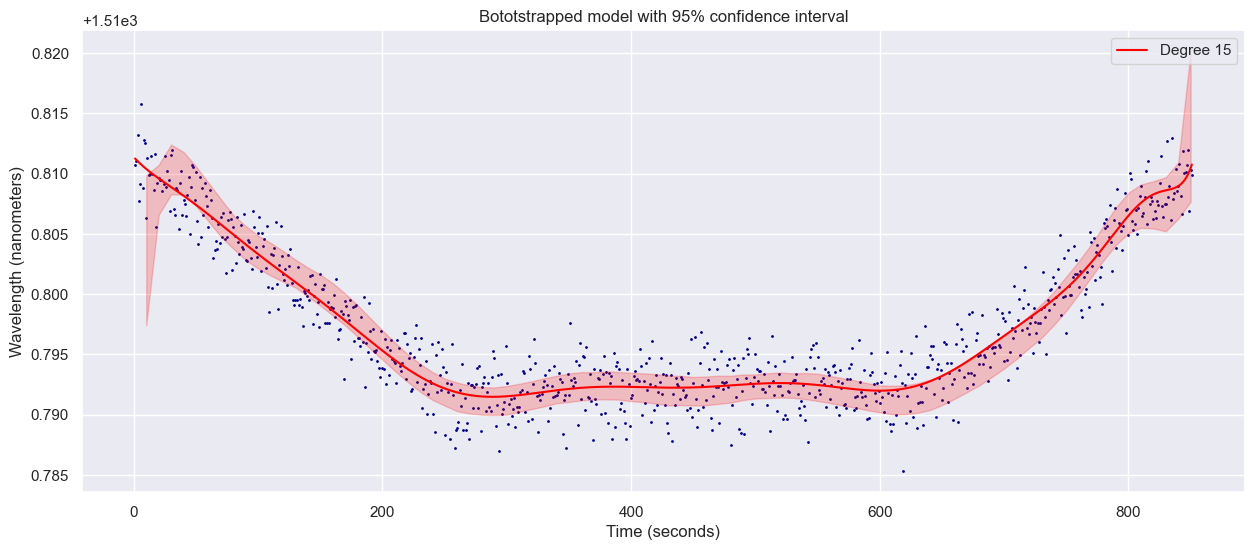

In [1030]:
# Plot the fitted model with confidence intervals
plt.figure(figsize=(15, 6))
plt.scatter(time, wavelength, color='darkblue', s=1)
plt.plot(time_pred, wavelength_pred, color='red', label=f'Degree {degree}')
plt.fill_between(time_sample, quantile_25, quantile_975, color='red', alpha=0.2)
plt.xlabel('Time (seconds)')
plt.ylabel('Wavelength (nanometers)')
plt.title('Bototstrapped model with 95% confidence interval')
plt.legend()
plt.show()

Show graphically that as the number of bootstrapped samples increases, the bootstrapped confidence band converges to the actual confidence band.

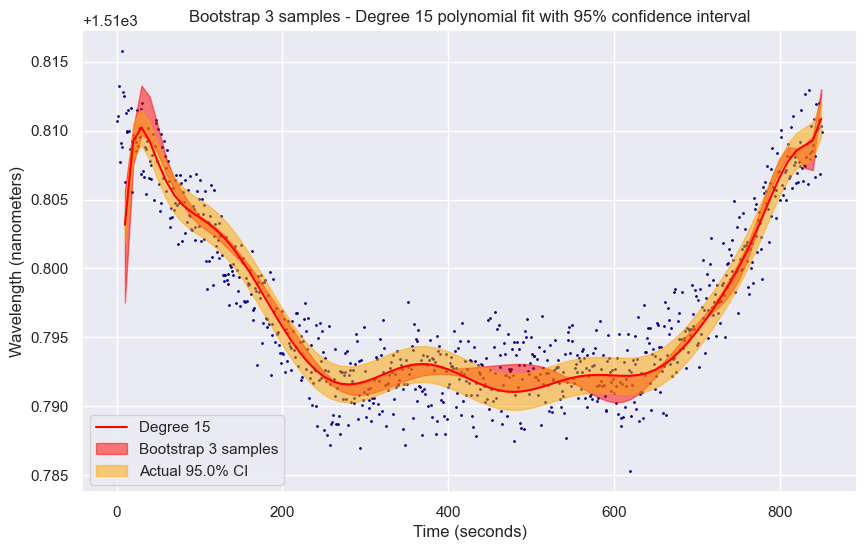

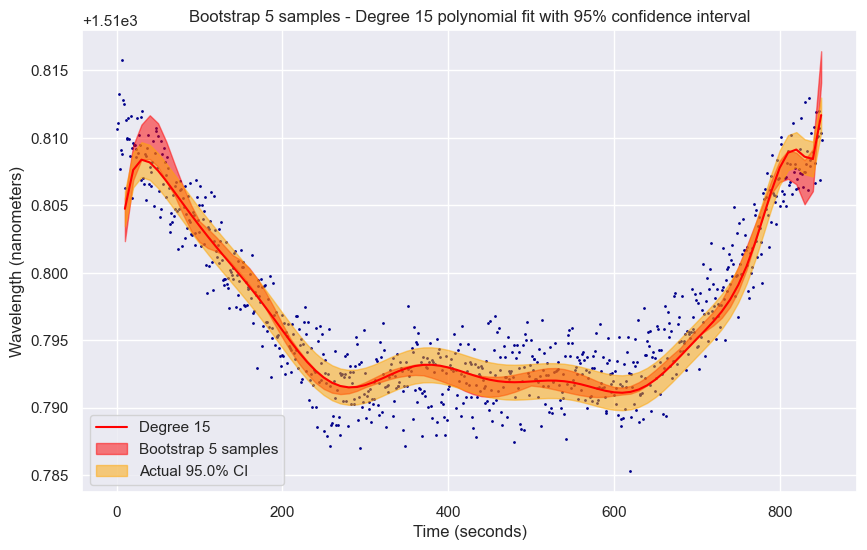

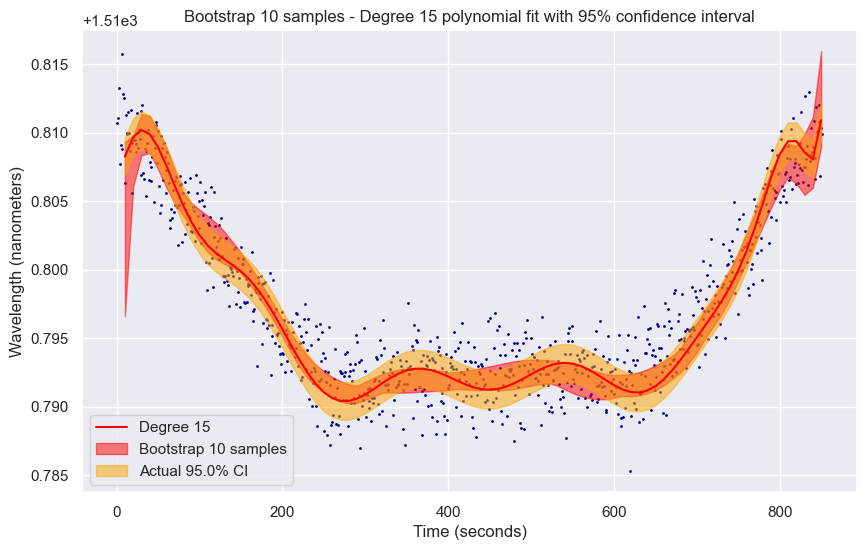

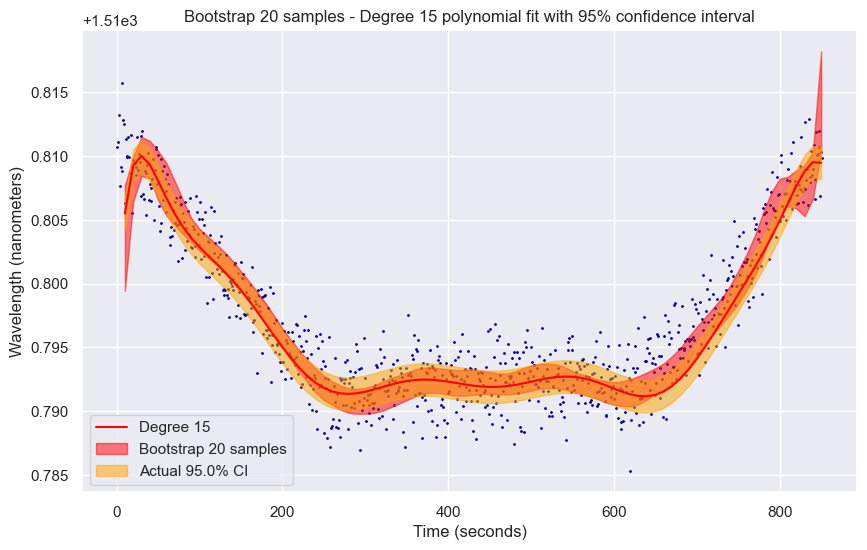

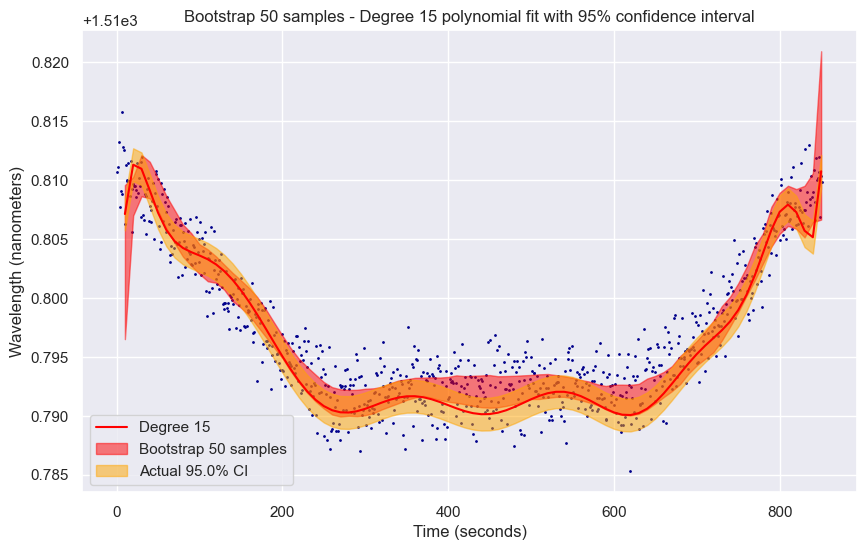

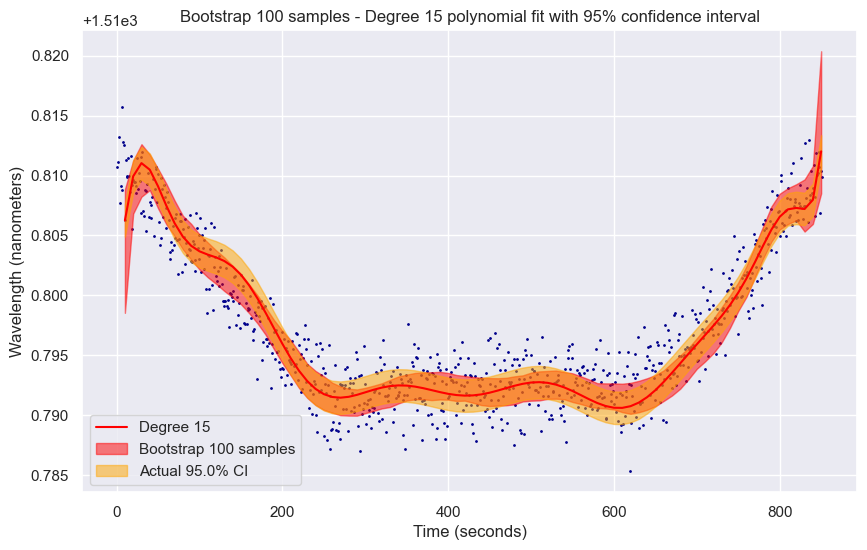

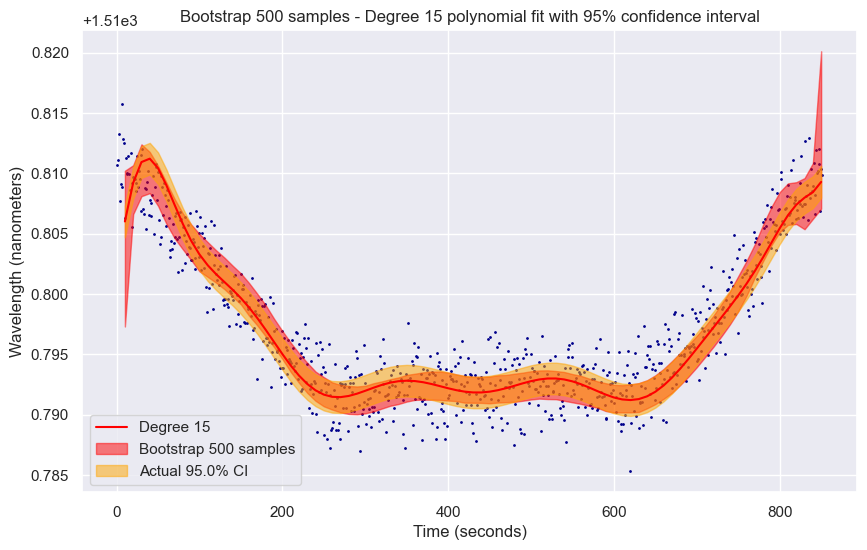

In [1035]:
degree = aic_df[aic_df['aic'] == aic_df['aic'].min()]['degree'].values[0]
poly = PolynomialFeatures(degree=degree)

no_of_bootstampled_samples = [3, 5, 10, 20, 50, 100, 500] 

for i in no_of_bootstampled_samples:
    predicted_values = pd.DataFrame(columns = ['time'])
    predicted_values.set_index('time', inplace = True)

    for j in range(i):
        dataframe = fit_model_predict_plot_bootsrap(time, wavelength, degree)
        predicted_values = pd.concat([predicted_values, dataframe['wavelength']], axis = 1)

    quantile_25 = predicted_values[:].apply(lambda x: x.quantile(0.025), axis=1)
    quantile_975 = predicted_values[:].apply(lambda x: x.quantile(0.975), axis=1)
    
    #Create new time array for prediction
    time_pred = np.linspace(min(time_sample), max(time_sample), time_sample.shape[0])
    time_standardised_pred = (time_pred - np.mean(time_sample)) / np.std(time_sample)
    time_standardised_poly_pred = poly.fit_transform(time_standardised_pred.reshape(-1, 1))
    wavelength_pred = model.predict(time_standardised_poly_pred)


    plt.figure(figsize=(10, 6))
    plt.scatter(time, wavelength, color='darkblue', s=1)
    plt.plot(time_pred, wavelength_pred, color='red', label=f'Degree {degree}')
    plt.fill_between(time_sample, quantile_25, quantile_975, color='red', alpha=0.5, label=f'Bootstrap {i} samples')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Wavelength (nanometers)')
    plt.title(f'Bootstrap {i} samples - Degree {degree} polynomial fit with 95% confidence interval') 

    #calculate the actual confidence interval

    conf_level = 0.95
    z = norm.ppf((1+conf_level)/2) # z value for 95% confidence interval
    actual_25 = wavelength_pred - (z * (wavelength_pred.std()/np.sqrt(len(wavelength_pred)))) #use the z transformed value to calculate the actual confidence interval
    actual_975 = wavelength_pred + (z * (wavelength_pred.std()/np.sqrt(len(wavelength_pred))))
    plt.fill_between(time_sample, actual_25, actual_975, color="orange", alpha = 0.5, label=f'Actual {conf_level*100}% CI')

    plt.legend(loc='lower left')
    plt.show()
 